<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 10</h2>
<h3 align='center'>April 17, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Introduction
In this assignment, we analyse signals using the Fast Fourier transform, or the FFT for short. The FFT is a fast implementation of the Discrete Fourier transform(DFT). It runs in $\mathcal{O}(n \log n)$ time complexity. We find the FFTs of various types of signals using the numpy.fft module. We also attempt to approximate the continuous time fourier transform of a gaussian by windowing and sampling in time domain, and then taking the DFT. We iteratively increase window size and number of samples until we obtain an estimate of required accuracy.

In [1]:
%%capture
# Importing numpy and matplotlib
from pylab import *
from IPython.display import *

In [2]:
rcParams['figure.figsize'] = 18,6
rcParams['font.size'] = 18
rcParams['text.usetex'] = True
import writefile_run

In [3]:
%%capture
%%writefile_run ee16b033_10.py -dr

import sys
import argparse
from pylab import *
from IPython.display import *
rcParams['figure.figsize'] = 18,6
rcParams['font.size'] = 18
rcParams['text.usetex'] = True

"""
Get command line arguments and assign them to variables automatically.
"""

ARGS = {}

def addargs(args,parser):
    for arg in args:
        parser.add_argument('-{}'.format(arg),default=args[arg],type=type(args[arg]))
        
ap = argparse.ArgumentParser()
addargs(ARGS,ap)
args = ap.parse_args()

for arg in ARGS:
    exec("{} = args.{}".format(arg,arg))
    

# FFT with hamming window

In [4]:
%%writefile_run ee16b033_10.py -a


def hamming(n):
    n = array(n)
    N = n.shape[0]
    return 0.54+0.46*cos(2*pi*n/(N-1))

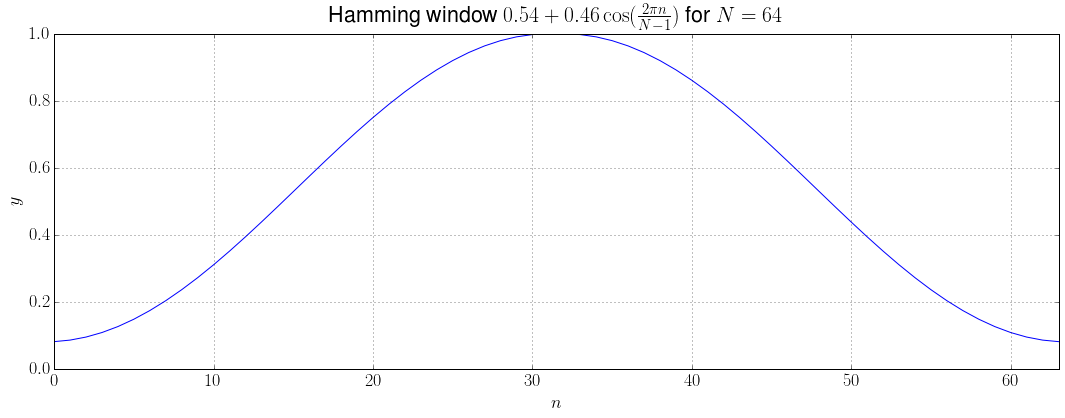

In [5]:
n = arange(64)
plot(n,fftshift(hamming(n)))
grid()
xlim(0,63)
ylabel("$y$")
xlabel("$n$")
title(r"Hamming window $0.54+0.46\cos(\frac{2\pi n}{N-1})$ for $N = 64$")
show()

In [6]:
def plotFFTWindowed(f, t_range=(-8*pi,8*pi), N = 128, window=True, tol=1e-4, w_range=(-5,5)):
    
    t = linspace(*t_range,N+1)[:-1]
    delta_t = (t_range[1]-t_range[0])/N
    
    w_max = pi/delta_t
    delta_w = 2*w_max/N
    print(delta_w)
    w = linspace(-w_max,w_max,N+1)[:-1]
    
    wnd = fftshift(hamming(arange(N)))
    
    
    y = f((t))
    if window:
        y = y*wnd
    plot(t,y)
    Y = 1/N * fftshift(fft(y))
    
    mag = abs(Y)
    ph = angle(Y)
    ph[where(abs(mag)<tol)]=0
    ph[where(abs(ph)<tol)]=0
    #ph = unwrap(ph)
    
    subplots(1,2)
    
    subplot(1,2,1)
    grid()
    plot(w,mag)
    scatter(w,mag,s=40)
    xlim(w_range)
    
    subplot(1,2,2)
    grid()
    plot(w,ph)
    scatter(w,ph)
    xlim(w_range)
    

1.0


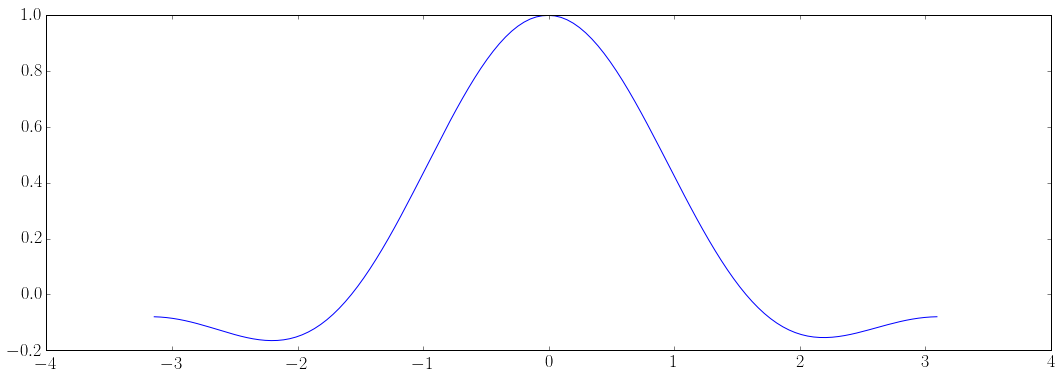

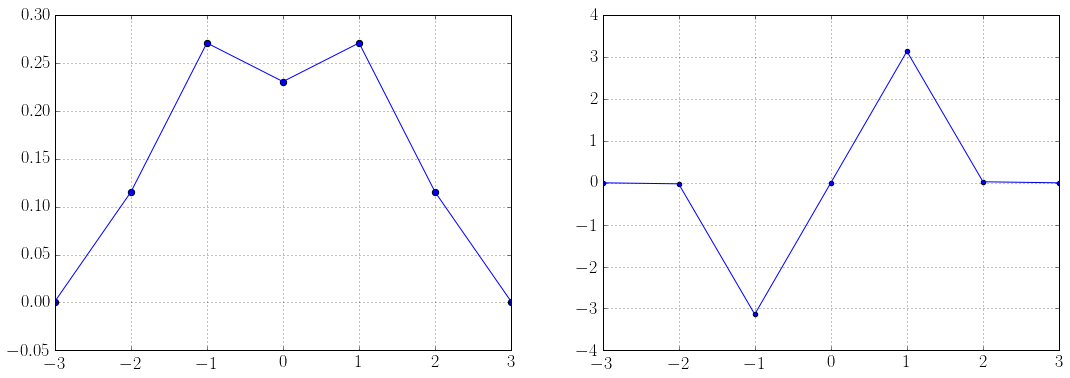

In [7]:
plotFFTWindowed(lambda x: cos(1*x), N = 128, t_range=(-pi,pi), w_range=(-3,3),tol=1e-2, window=True)

In [8]:
%%writefile_run ee16b033_10.py -a


def plotFFT(func,t_range=(0,2*pi),points=128,tol=1e-5,
            func_name=None,unwrap_=True,wlim=(-10,10),scatter_size=40,
           iff=False, plot=True):
    """Plot the FFT of the given continuous function.
    
    func : the continuous function
    t_range : the time range over which to sample the function,
        exclusive of the last value
    points : number of samples
    tol : tolerance for setting phase to 0 when magnitude is low
    func_name : name of the function
    unwrap : whether to unwrap phase
    wlim : range of frequencies for the plots, give None for all frequencies
    scatter_size : size of scatter plot points
    iff: whether to do an ifftshift on the time range
    
    Returns:
    numpy array containing the FFT, after being shifted and normalized.
    """
    
    # default name for function
    if func_name == None:
        func_name = func.__name__
    
    # time points to sample
    t = linspace(*t_range,points+1)[:-1]
    T = t_range[1]-t_range[0]
    samplingfreq = points/T
    
    if iff:
        t = ifftshift(t)
    
    # corresponding frequencies of the sampled signal
    w = linspace(-pi,pi,points+1)[:-1]
    w = w*samplingfreq
    
    # find fft
    y = func(t)
    Y =  fftshift( fft(y))/points
    
    if not plot:return w,Y
    # get phase
    ph = angle(Y)
    if unwrap_:
        ph = unwrap(ph)
    
    # get mag
    mag = abs(Y)
    
    # clean up phase where mag is sufficiently close to 0
    ph[where(mag<tol)]=0
    
    # plot 
    fig,axes = subplots(1,2)
    ax1,ax2 = axes
    
    # magnitude
    ax1.set_title("Magnitude of DFT of {}".format(func_name))
    ax1.set_xlabel("Frequency in rad/s")
    ax1.set_ylabel("Magnitude")
    ax1.plot(w,mag,color='red')#,s=scatter_size)
    ax1.set_xlim(wlim)
    ax1.grid()
    
    # phase
    ax2.set_title("Phase of DFT of {}".format(func_name))
    ax2.set_xlabel("Frequency in rad/s")
    ax2.set_ylabel("Phase in rad")
    ax2.scatter(w,ph,color='green',s=scatter_size)
    ax2.set_xlim(wlim)
    ax2.grid()
    
    show()
    return w,Y

In [9]:
%%writefile_run ee16b033_10.py -a


def chirp(t):
    return cos(64*t*(1.5 + t/(2*pi)))

In [10]:
w,y = plotFFT(chirp, t_range=(-pi,pi), points=1024, wlim=(-80,80), unwrap_=False, plot=False)

In [11]:
%%writefile_run ee16b033_10.py -a


N = 1024
window = 64
n_wins = int(N/window)
delta_t = 2*pi/N
w_max = pi/delta_t
delta_w = 2*w_max/N
    
t = linspace(-pi,pi,N+1)[:-1]
y = chirp(t)

ys=[]
for i in range(0,N,window):
    y_ = y[i:i+window]*fftshift(hamming(arange(window)))
    Y = 1/window * fftshift(fft(y_))
    ys.append(Y)
    
t = linspace(-pi,pi,n_wins)
w = linspace(-w_max,w_max,window+1)[:-1]
#print(w)
tt,ww = meshgrid(t,w)
#print(tt)
ys = array(ys)
print(ys.shape)

(16, 64)


(-200, 200)

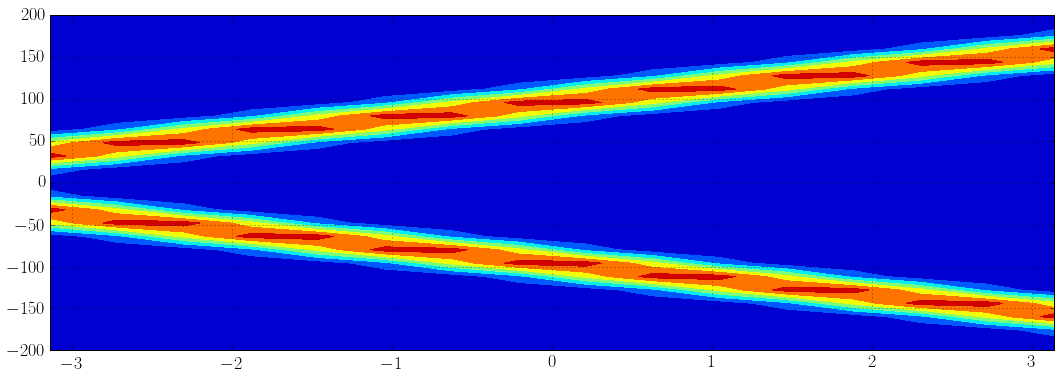

In [12]:
contourf(tt,ww,abs(ys.T))
grid()
ylim(-200,200)

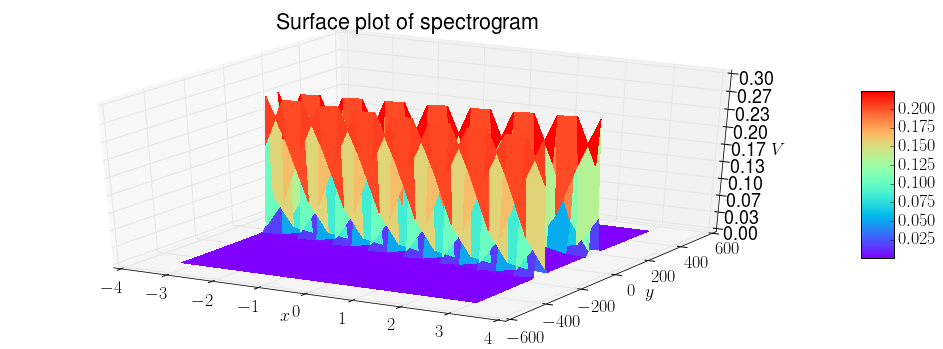

In [14]:
%%writefile_run ee16b033_10.py -a



from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig2 = figure()
ax2 = fig2.gca(projection='3d')
ax2.set_title("Surface plot of spectrogram")
surf = ax2.plot_surface(tt,ww,abs(ys.T),cmap=cm.rainbow,
                       linewidth=0, antialiased=False,rstride=1,cstride=1)

ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.set_zlabel("$V$")
fig2.colorbar(surf, shrink=0.5, aspect=5)
show()